# Predicting California Housing Prices

### Reading in the dataset using pandas

In [1]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv/housing.csv')

In [2]:
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Converting the categorical column to numerical

In [4]:
pd.get_dummies(housing_pd['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [5]:
housing_pd_final = pd.concat([housing_pd.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [6]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',	
                                     'housing_median_age',	'total_rooms',	
                                     'total_bedrooms',	'population',	
                                     'households',	'median_income',	
                                     '<1H OCEAN',	
                                     'INLAND',	'ISLAND',	
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [7]:
housing_corr=housing_pd_final.corr()
housing_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

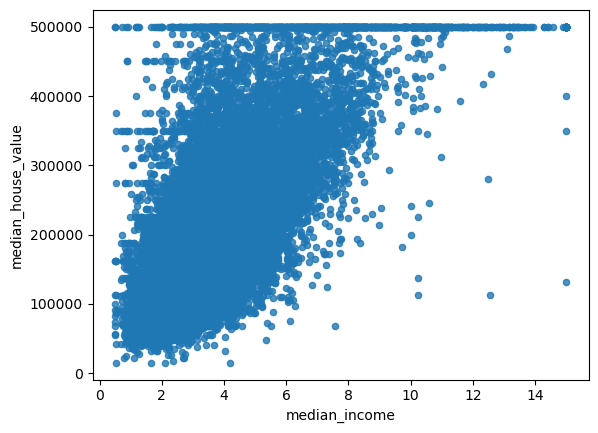

In [8]:
housing_pd_final.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.8)

In [9]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

### Seperating the dataset into x and y for training and predicting accuracy

In [10]:
X=housing_pd_final.drop("median_house_value",axis=1)
y=housing_pd_final["median_house_value"]

### Splitting the dataset into train, test and cross val 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_1, y_train, y_1 = train_test_split(X,y,test_size=0.2)
X_test ,X_val, y_test, y_val = train_test_split(X_1,y_1,test_size=0.5)

In [12]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((16346, 13), (16346,), (2044, 13), (2044,), (2043, 13), (2043,))

### Using StandardScaler to scale the columns 

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X_train.iloc[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.809893,-1.050986,-1.874663,-1.131082,-1.189081,-1.237544,-1.268202,-0.613955,0.0,1.0,0.0,0.0,0.0
1,0.598237,-0.712931,1.855243,-0.619798,-0.617550,-0.757673,-0.600289,-0.468222,1.0,0.0,0.0,0.0,0.0
2,-1.219247,1.104113,-0.049390,0.092035,-0.264546,-0.048143,-0.149713,1.241235,0.0,1.0,0.0,0.0,0.0
3,0.993778,-0.727017,-1.954023,-0.224694,0.100466,-0.306398,-0.155014,-0.378564,0.0,1.0,0.0,0.0,0.0
4,-0.453200,-0.450000,-1.874663,0.122002,0.393435,-0.110696,0.314115,-0.451272,0.0,0.0,0.0,0.0,1.0


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

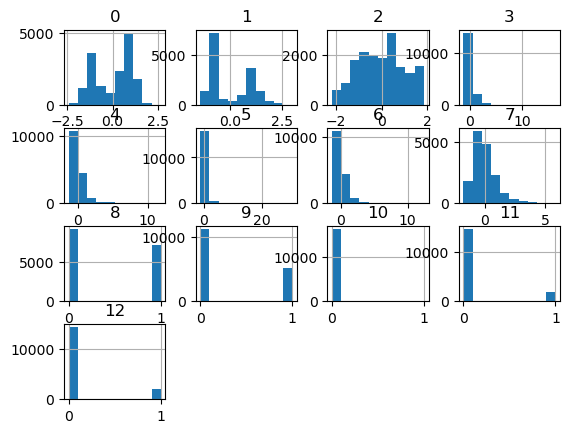

In [15]:
pd.DataFrame(X_train).hist()

### Fitting the data to different models to find out the model that performs the best 

In [16]:
## Linear Regression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(68529.34782422884, 70119.65089423551)

In [17]:
## K Nearest Neigbours
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(53950.96998206038, 61588.047555205354)

In [18]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(43260.54978706819, 53372.26162701481)

In [19]:
## Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(46437.80988453804, 51028.96717696872)

In [20]:
# Simple Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential([
            InputLayer((13,)),
            Dense(2, 'relu'),
            Dense(1, 'linear')])

cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=Adam(learning_rate=.1), loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
511/511 [==============================] - 2s 4ms/step - loss: 51751927808.0000 - root_mean_squared_error: 227490.5000 - val_loss: 46842753024.0000 - val_root_mean_squared_error: 216431.8594
Epoch 2/100
511/511 [==============================] - 1s 3ms/step - loss: 33924978688.0000 - root_mean_squared_error: 184187.3438 - val_loss: 24477933568.0000 - val_root_mean_squared_error: 156454.2500
Epoch 3/100
511/511 [==============================] - 2s 3ms/step - loss: 14975553536.0000 - root_mean_squared_error: 122374.6406 - val_loss: 9872928768.0000 - val_root_mean_squared_error: 99362.6094
Epoch 4/100
511/511 [==============================] - 1s 3ms/step - loss: 6887195136.0000 - root_mean_squared_error: 82989.1250 - val_loss: 5896886784.0000 - val_root_mean_squared_error: 76791.1875
Epoch 5/100
511/511 [==============================] - 2s 3ms/step - loss: 5256263680.0000 - root_mean_squared_error: 72500.0938 - val_loss: 5234369024.0000 - val_root_mean_squared_error: 72348.

511/511 [==============================] - 2s 3ms/step - loss: 4576246272.0000 - root_mean_squared_error: 67647.9609 - val_loss: 4815375872.0000 - val_root_mean_squared_error: 69392.9062
Epoch 27/100
511/511 [==============================] - 1s 2ms/step - loss: 4571181568.0000 - root_mean_squared_error: 67610.5156 - val_loss: 4825229824.0000 - val_root_mean_squared_error: 69463.8750
Epoch 28/100
511/511 [==============================] - 1s 2ms/step - loss: 4567420416.0000 - root_mean_squared_error: 67582.6953 - val_loss: 4820103680.0000 - val_root_mean_squared_error: 69426.9688
Epoch 29/100
511/511 [==============================] - 2s 3ms/step - loss: 4565545984.0000 - root_mean_squared_error: 67568.8203 - val_loss: 4805928960.0000 - val_root_mean_squared_error: 69324.8047
Epoch 30/100
511/511 [==============================] - 2s 4ms/step - loss: 4560166400.0000 - root_mean_squared_error: 67529.0078 - val_loss: 4799346688.0000 - val_root_mean_squared_error: 69277.3203
Epoch 31/100


Epoch 54/100
511/511 [==============================] - 1s 2ms/step - loss: 4460873216.0000 - root_mean_squared_error: 66789.7656 - val_loss: 4726931968.0000 - val_root_mean_squared_error: 68752.6875
Epoch 55/100
511/511 [==============================] - 2s 3ms/step - loss: 4456892928.0000 - root_mean_squared_error: 66759.9688 - val_loss: 4708428800.0000 - val_root_mean_squared_error: 68617.9922
Epoch 56/100
511/511 [==============================] - 2s 3ms/step - loss: 4452250624.0000 - root_mean_squared_error: 66725.1875 - val_loss: 4693582336.0000 - val_root_mean_squared_error: 68509.7266
Epoch 57/100
511/511 [==============================] - 1s 1ms/step - loss: 4447958016.0000 - root_mean_squared_error: 66693.0156 - val_loss: 4699860480.0000 - val_root_mean_squared_error: 68555.5312
Epoch 58/100
511/511 [==============================] - 1s 2ms/step - loss: 4445541376.0000 - root_mean_squared_error: 66674.8906 - val_loss: 4697563136.0000 - val_root_mean_squared_error: 68538.7734


511/511 [==============================] - 2s 4ms/step - loss: 4378846720.0000 - root_mean_squared_error: 66172.8516 - val_loss: 4639118848.0000 - val_root_mean_squared_error: 68111.0781
Epoch 87/100
511/511 [==============================] - 1s 2ms/step - loss: 4378295296.0000 - root_mean_squared_error: 66168.6875 - val_loss: 4641733632.0000 - val_root_mean_squared_error: 68130.2734
Epoch 88/100
511/511 [==============================] - 2s 3ms/step - loss: 4377119744.0000 - root_mean_squared_error: 66159.8047 - val_loss: 4634784256.0000 - val_root_mean_squared_error: 68079.2500
Epoch 89/100
511/511 [==============================] - 1s 2ms/step - loss: 4374292480.0000 - root_mean_squared_error: 66138.4375 - val_loss: 4655670272.0000 - val_root_mean_squared_error: 68232.4688
Epoch 90/100
511/511 [==============================] - 1s 2ms/step - loss: 4375672832.0000 - root_mean_squared_error: 66148.8672 - val_loss: 4642697216.0000 - val_root_mean_squared_error: 68137.3438
Epoch 91/100


In [21]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

64/64 [==============================] - 0s 1ms/step


(66013.30531954118, 68015.43310451938)

In [22]:
## Medium Neural Network
medium_nn = Sequential([
            InputLayer((13,)),
            Dense(32, 'relu'),
            Dense(16, 'relu'),
            Dense(1, 'linear')])

cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=Adam(learning_rate=.1), loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
511/511 [==============================] - 3s 4ms/step - loss: 9329539072.0000 - root_mean_squared_error: 96589.5391 - val_loss: 4804009984.0000 - val_root_mean_squared_error: 69310.9688
Epoch 2/100
511/511 [==============================] - 2s 4ms/step - loss: 4452628992.0000 - root_mean_squared_error: 66728.0234 - val_loss: 4643966464.0000 - val_root_mean_squared_error: 68146.6562
Epoch 3/100
511/511 [==============================] - 2s 4ms/step - loss: 4370277888.0000 - root_mean_squared_error: 66108.0781 - val_loss: 4601673216.0000 - val_root_mean_squared_error: 67835.6328
Epoch 4/100
511/511 [==============================] - 2s 4ms/step - loss: 4340899840.0000 - root_mean_squared_error: 65885.5078 - val_loss: 4546343424.0000 - val_root_mean_squared_error: 67426.5781
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 4255685120.0000 - root_mean_squared_error: 65235.6133 - val_loss: 4479408128.0000 - val_root_mean_squared_error: 66928.3828
Epoch

Epoch 30/100
511/511 [==============================] - 1s 2ms/step - loss: 3546229760.0000 - root_mean_squared_error: 59550.2305 - val_loss: 4233851904.0000 - val_root_mean_squared_error: 65068.0547
Epoch 31/100
511/511 [==============================] - 2s 4ms/step - loss: 3496739840.0000 - root_mean_squared_error: 59133.2383 - val_loss: 3641278976.0000 - val_root_mean_squared_error: 60343.0117
Epoch 32/100
511/511 [==============================] - 2s 4ms/step - loss: 3480777472.0000 - root_mean_squared_error: 58998.1133 - val_loss: 3612833024.0000 - val_root_mean_squared_error: 60106.8477
Epoch 33/100
511/511 [==============================] - 2s 4ms/step - loss: 3432273408.0000 - root_mean_squared_error: 58585.6094 - val_loss: 3585878272.0000 - val_root_mean_squared_error: 59882.2031
Epoch 34/100
511/511 [==============================] - 1s 2ms/step - loss: 3402118400.0000 - root_mean_squared_error: 58327.6797 - val_loss: 3747102976.0000 - val_root_mean_squared_error: 61213.5859


511/511 [==============================] - 1s 2ms/step - loss: 2901619968.0000 - root_mean_squared_error: 53866.6875 - val_loss: 3313206016.0000 - val_root_mean_squared_error: 57560.4570
Epoch 64/100
511/511 [==============================] - 2s 4ms/step - loss: 2932088320.0000 - root_mean_squared_error: 54148.7617 - val_loss: 3185273856.0000 - val_root_mean_squared_error: 56438.2305
Epoch 65/100
511/511 [==============================] - 2s 4ms/step - loss: 2919161088.0000 - root_mean_squared_error: 54029.2617 - val_loss: 3170408704.0000 - val_root_mean_squared_error: 56306.3828
Epoch 66/100
511/511 [==============================] - 2s 4ms/step - loss: 2906635776.0000 - root_mean_squared_error: 53913.2227 - val_loss: 3154248960.0000 - val_root_mean_squared_error: 56162.6992
Epoch 67/100
511/511 [==============================] - 2s 4ms/step - loss: 2867475456.0000 - root_mean_squared_error: 53548.8125 - val_loss: 3144377600.0000 - val_root_mean_squared_error: 56074.7500
Epoch 68/100


Epoch 94/100
511/511 [==============================] - 1s 2ms/step - loss: 2714641664.0000 - root_mean_squared_error: 52102.2227 - val_loss: 3050888192.0000 - val_root_mean_squared_error: 55234.8477
Epoch 95/100
511/511 [==============================] - 1s 2ms/step - loss: 2733165824.0000 - root_mean_squared_error: 52279.6875 - val_loss: 3142070272.0000 - val_root_mean_squared_error: 56054.1719
Epoch 96/100
511/511 [==============================] - 2s 4ms/step - loss: 2715003648.0000 - root_mean_squared_error: 52105.6953 - val_loss: 2919831296.0000 - val_root_mean_squared_error: 54035.4648
Epoch 97/100
511/511 [==============================] - 1s 2ms/step - loss: 2705219840.0000 - root_mean_squared_error: 52011.7266 - val_loss: 2996387328.0000 - val_root_mean_squared_error: 54739.2656
Epoch 98/100
511/511 [==============================] - 1s 2ms/step - loss: 2718983680.0000 - root_mean_squared_error: 52143.8750 - val_loss: 3117517824.0000 - val_root_mean_squared_error: 55834.7383


In [23]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

64/64 [==============================] - 0s 1ms/step


(51286.7792589083, 54035.459892905455)

In [24]:
## Large Neural Network
large_nn = Sequential([
           InputLayer((13,)),
           Dense(256, 'relu'),
           Dense(128, 'relu'),
           Dense(64, 'relu'),
           Dense(32, 'relu'),
           Dense(1, 'linear')])

cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer= Adam(learning_rate=.1), loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
511/511 [==============================] - 4s 6ms/step - loss: 6205508608.0000 - root_mean_squared_error: 78775.0469 - val_loss: 5649101312.0000 - val_root_mean_squared_error: 75160.5000
Epoch 2/100
511/511 [==============================] - 1s 2ms/step - loss: 4698028032.0000 - root_mean_squared_error: 68542.1641 - val_loss: 6208489984.0000 - val_root_mean_squared_error: 78793.9688
Epoch 3/100
511/511 [==============================] - 3s 6ms/step - loss: 4214998784.0000 - root_mean_squared_error: 64923.0234 - val_loss: 3994492416.0000 - val_root_mean_squared_error: 63201.9961
Epoch 4/100
511/511 [==============================] - 1s 3ms/step - loss: 4067743488.0000 - root_mean_squared_error: 63778.8633 - val_loss: 4286542592.0000 - val_root_mean_squared_error: 65471.6914
Epoch 5/100
511/511 [==============================] - 1s 3ms/step - loss: 3811108864.0000 - root_mean_squared_error: 61734.1797 - val_loss: 4604455424.0000 - val_root_mean_squared_error: 67856.1406
Epoch

Epoch 31/100
511/511 [==============================] - 1s 2ms/step - loss: 2797431040.0000 - root_mean_squared_error: 52890.7461 - val_loss: 3059361792.0000 - val_root_mean_squared_error: 55311.4961
Epoch 32/100
511/511 [==============================] - 3s 5ms/step - loss: 2764379136.0000 - root_mean_squared_error: 52577.3633 - val_loss: 2892765696.0000 - val_root_mean_squared_error: 53784.4375
Epoch 33/100
511/511 [==============================] - 1s 2ms/step - loss: 2764758272.0000 - root_mean_squared_error: 52580.9688 - val_loss: 3177620224.0000 - val_root_mean_squared_error: 56370.3828
Epoch 34/100
511/511 [==============================] - 1s 2ms/step - loss: 2733791232.0000 - root_mean_squared_error: 52285.6680 - val_loss: 3029594368.0000 - val_root_mean_squared_error: 55041.7500
Epoch 35/100
511/511 [==============================] - 3s 5ms/step - loss: 2687617024.0000 - root_mean_squared_error: 51842.2305 - val_loss: 2835437312.0000 - val_root_mean_squared_error: 53248.8242


Epoch 68/100
511/511 [==============================] - 1s 2ms/step - loss: 2433439744.0000 - root_mean_squared_error: 49329.9062 - val_loss: 2817457152.0000 - val_root_mean_squared_error: 53079.7227
Epoch 69/100
511/511 [==============================] - 1s 2ms/step - loss: 2467710464.0000 - root_mean_squared_error: 49676.0547 - val_loss: 2817800448.0000 - val_root_mean_squared_error: 53082.9570
Epoch 70/100
511/511 [==============================] - 1s 2ms/step - loss: 2367577600.0000 - root_mean_squared_error: 48657.7617 - val_loss: 2840323840.0000 - val_root_mean_squared_error: 53294.6875
Epoch 71/100
511/511 [==============================] - 1s 2ms/step - loss: 2423021056.0000 - root_mean_squared_error: 49224.1914 - val_loss: 2911777536.0000 - val_root_mean_squared_error: 53960.8906
Epoch 72/100
511/511 [==============================] - 1s 2ms/step - loss: 2388941312.0000 - root_mean_squared_error: 48876.7969 - val_loss: 3164301312.0000 - val_root_mean_squared_error: 56252.1211


In [25]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

64/64 [==============================] - 0s 2ms/step


(46970.769651948336, 52300.06066981041)

### By running all the different models we see that the Gradient Boost Regressor is the one that performs the best, so we choose the same

In [26]:
mse(gbr.predict(X_test), y_test, squared=False)

51864.568876398145